In [1]:
import matplotlib.pyplot as plt

In [ ]:
%run "./File_Uploader.ipynb"

In [3]:
%run "./ANN_Observer.ipynb"

✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.


In [170]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


### Archive from 02.11.2024  CPA on Hundred-Time multiplication, for weighs 1 to 200

In [8]:
scope : cw.scope = None
target: cw.target = None

In [122]:
make_dir = "makefile_dir_basic_mult"
re_init_config = {"MAKEDIR" : f'./{make_dir}/'}
cw_setuper = CW_Setuper(firmware_reinit = True, re_init_dict  = re_init_config)
scope = cw_setuper.scope
target = cw_setuper.target

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_mult/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11219 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11219 bytes
✔️ Setuper initiated.


In [128]:
 np.save(f"./database/corrs_{name}.npy", np.array(ncorr_all))

Capturing and Analysing the traces::   0%|          | 0/2 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1200 [00:00<?, ?it/s]

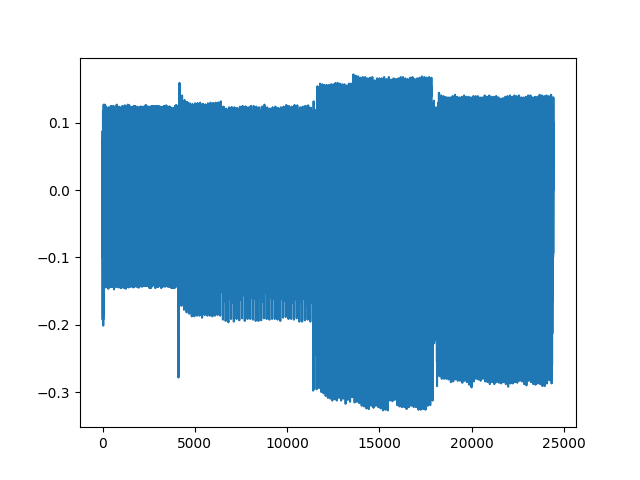

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1400 [00:00<?, ?it/s]

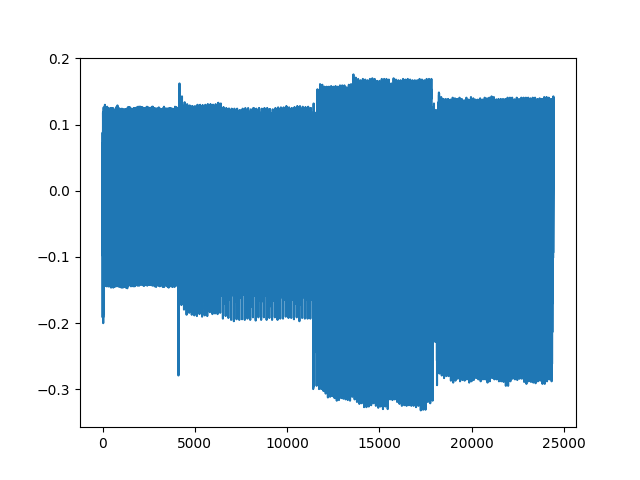

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

In [129]:
#epochs_list = [800, 1200, 1400]
epochs_list = [1200, 1400]
#epochs_list = [1500, 2000, 2500]
ncorr_all = None
decimate = 1
reverse = False
for i in trange(len(epochs_list), desc='Capturing and Analysing the traces:'):
    epochs = epochs_list[i]
    #cmd = 'p'
    #name = f"_OneTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
    cmd = 'p'
    name = f"_HundredTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
 
    scope_setup(samples=24430, decimate=decimate)    
    traces, rand_inputs = measure_traces(cmd=cmd)
    waves = []
    out_data = []
    for i in traces:
        waves.append(i[0])
        out_data.append(i[2])
    plot_one(np.array(waves[0]), type = name)
    files = save_data(waves, rand_inputs, out_data[0], name_extended = name)
    #upload_file_to_gdrive(files,  dir_path = "database/")

    #Analysis
    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0)

    np.save(f"./database/corrs_{name}.npy", np.array(ncorr_all))
    """
    secret_weight = []
    index = 0
    for i in out_data[0][3:out_data[0][2]+2]:
        secret_weight.append(i)

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex = get_weight(np.array(ncorr_all), show_info=False, nextIndex = index)
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")

        figure.savefig(f'{name}_correlation.png')

        cw.plot(colmn_maxVector) * cw.plot(ncorr_all[secret_value]) * cw.plot(ncorr_all[secret])
        plt.show()
    """

In [85]:
figure.savefig('800_1_one_mult_correlation.png')

### AKT

In [140]:
waves = np.load("./database/waves__HundredTimeMult_Dec1-ntg1-800.npy")
ncorr_all = np.load("./database/corrs__HundredTimeMult_Dec1-ntg1-800.npy")
secret_weight = np.load("./database/weights__HundredTimeMult_Dec1-ntg1-800.csv.npy")

In [142]:
secret_weight

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16,  0, 18, 19, 20, 21, 22, 23, 24])

In [131]:
waves[0]

array([ 0.03613281, -0.02050781,  0.03613281, ...,  0.1015625 ,
        0.13671875,  0.0703125 ])

In [116]:

    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0)

Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

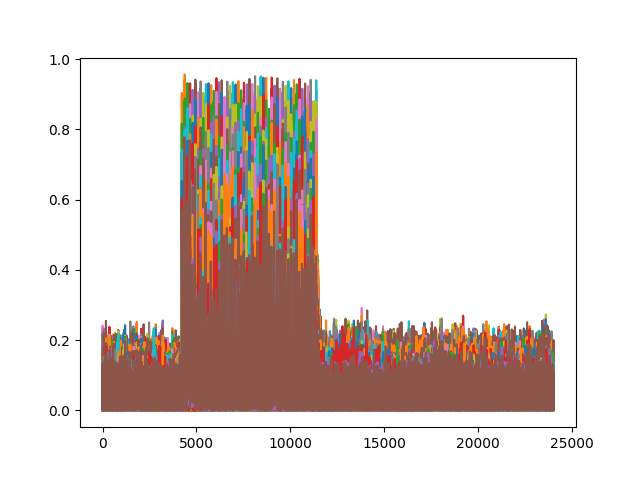

In [135]:
plot_mult(ncorr_all, type = "tmp")

In [133]:
cw.plot(ncorr_all[1])

:Curve   [x]   (y)

In range 0 - 24000
 Index of global max: 4374 and global_max_val: 0.9567577355392497


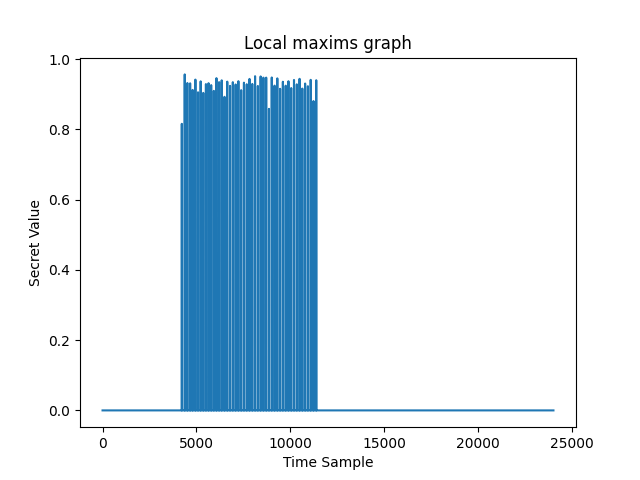

Local maxims: [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


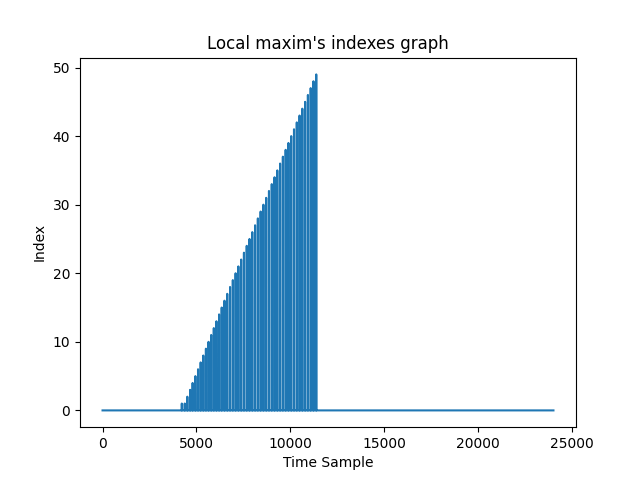

 Found the soonest secret value is 1, at the time sample 4218, with correlation secret_corr = 0.816


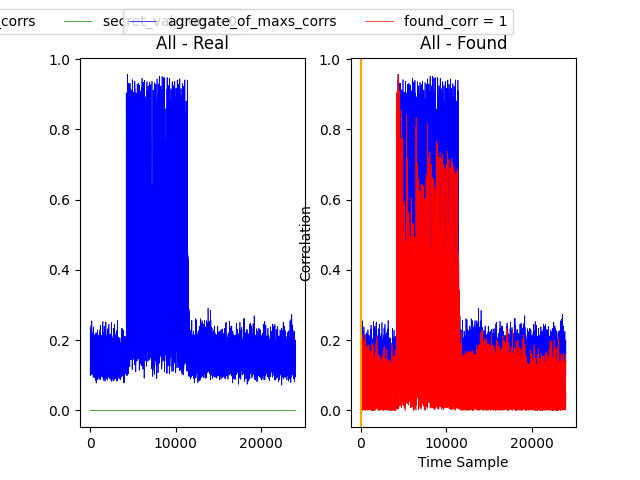

In range 4296 - 24000
 Found the soonest secret value is 1, at the time sample 4374, with correlation secret_corr = 0.957


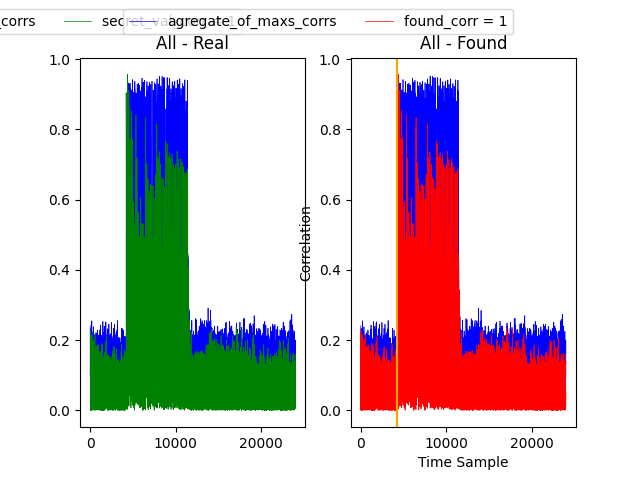

In range 4444 - 24000
 Found the soonest secret value is 2, at the time sample 4514, with correlation secret_corr = 0.932


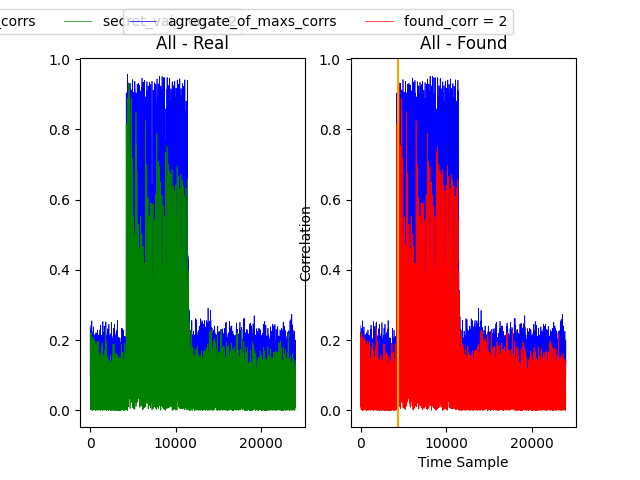

In range 4588 - 24000
 Found the soonest secret value is 3, at the time sample 4662, with correlation secret_corr = 0.931


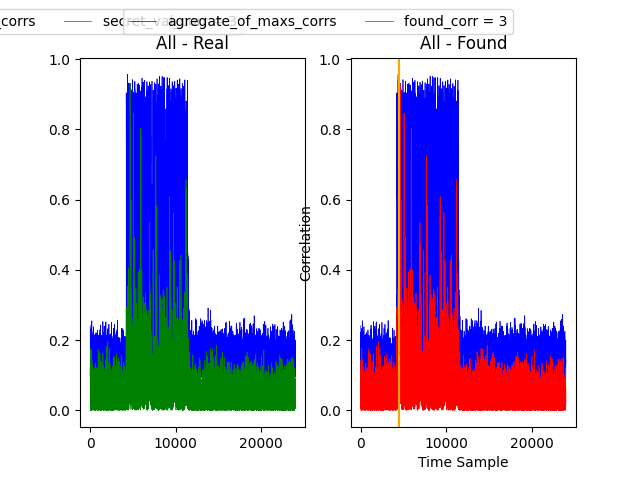

In range 4728 - 24000
 Found the soonest secret value is 4, at the time sample 4794, with correlation secret_corr = 0.913


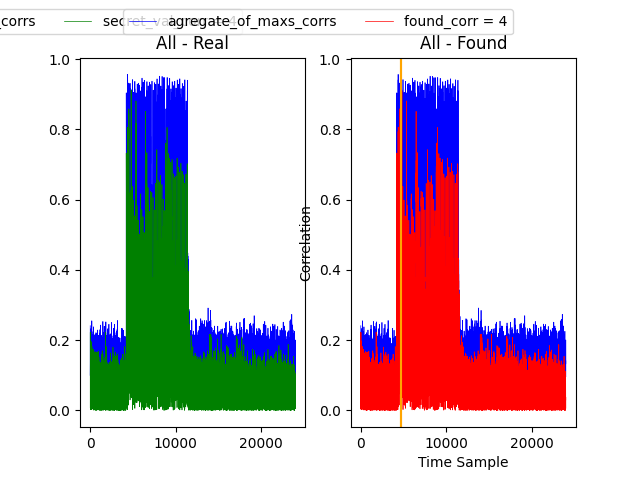

In range 4868 - 24000
 Found the soonest secret value is 5, at the time sample 4942, with correlation secret_corr = 0.942


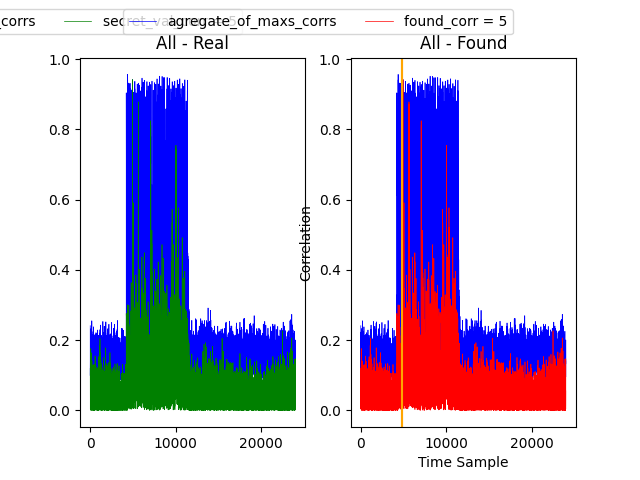

In range 5012 - 24000
 Found the soonest secret value is 6, at the time sample 5082, with correlation secret_corr = 0.906


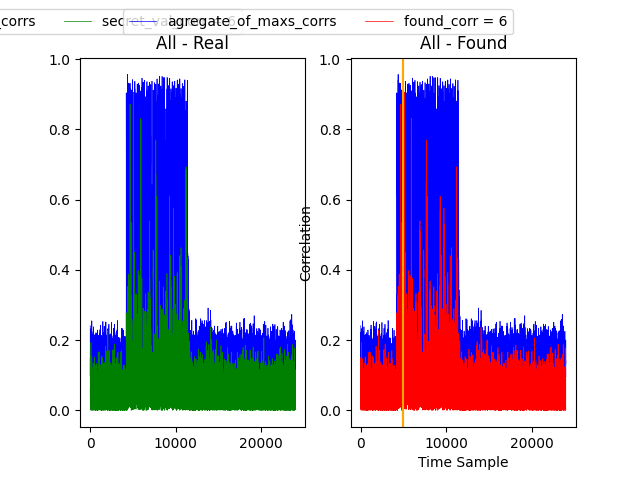

In range 5152 - 24000
 Found the soonest secret value is 7, at the time sample 5222, with correlation secret_corr = 0.937


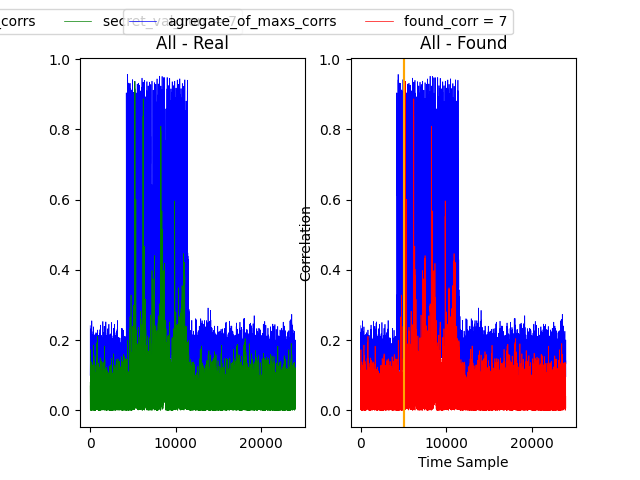

In range 5292 - 24000
 Found the soonest secret value is 8, at the time sample 5362, with correlation secret_corr = 0.904


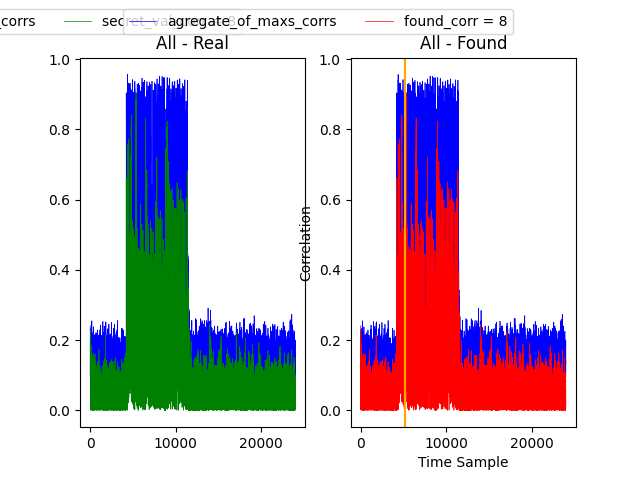

In range 5432 - 24000
 Found the soonest secret value is 9, at the time sample 5502, with correlation secret_corr = 0.929


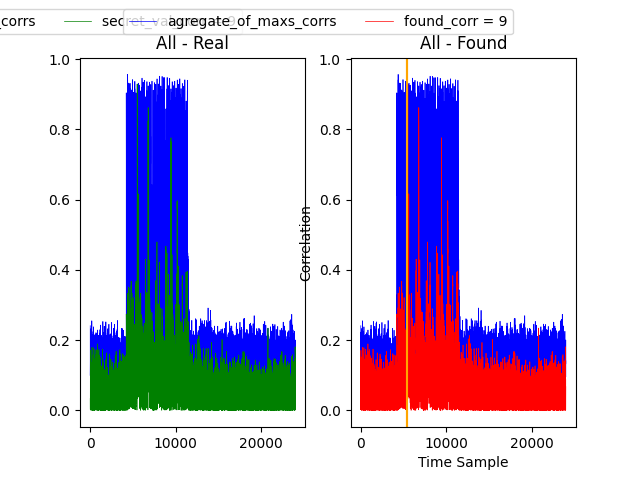

In range 5572 - 24000
 Found the soonest secret value is 10, at the time sample 5642, with correlation secret_corr = 0.932


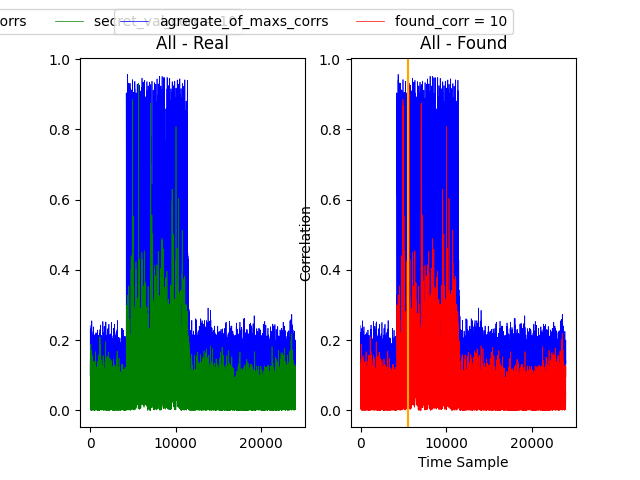

In range 5712 - 24000
 Found the soonest secret value is 11, at the time sample 5782, with correlation secret_corr = 0.926


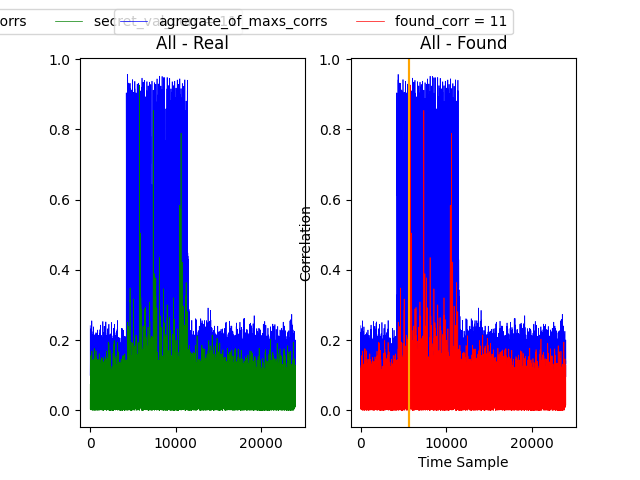

In range 5852 - 24000
 Found the soonest secret value is 12, at the time sample 5922, with correlation secret_corr = 0.910


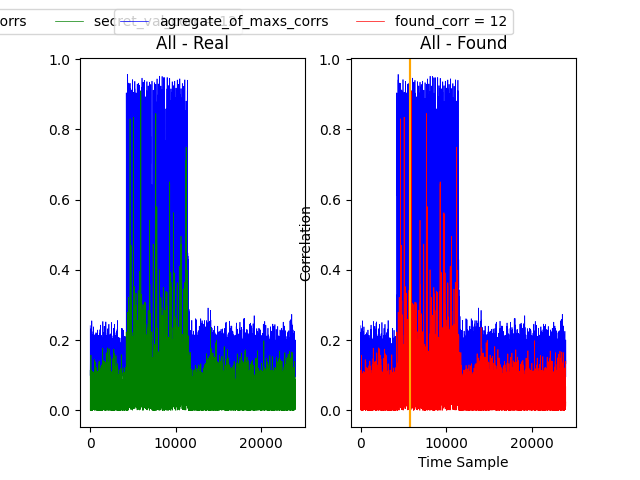

In range 5992 - 24000
 Found the soonest secret value is 13, at the time sample 6062, with correlation secret_corr = 0.946


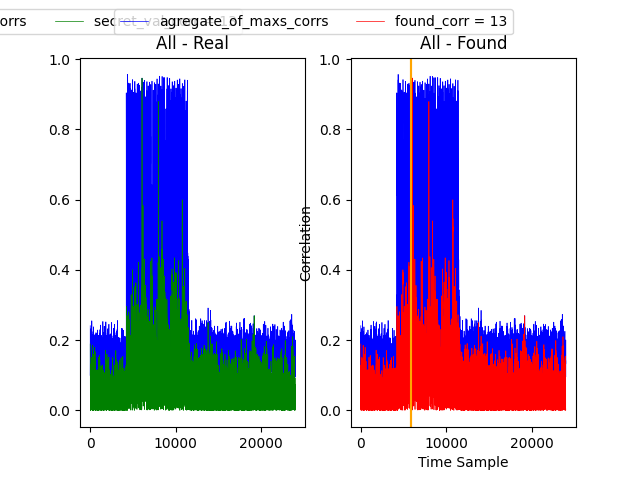

In range 6132 - 24000
 Found the soonest secret value is 14, at the time sample 6202, with correlation secret_corr = 0.935


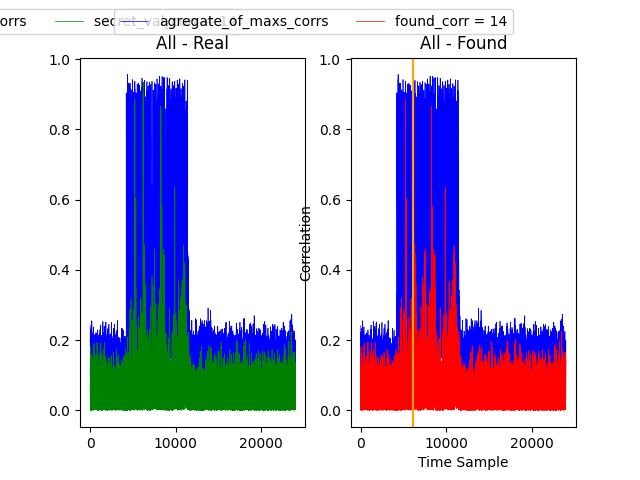

In range 6272 - 24000
 Found the soonest secret value is 15, at the time sample 6342, with correlation secret_corr = 0.940


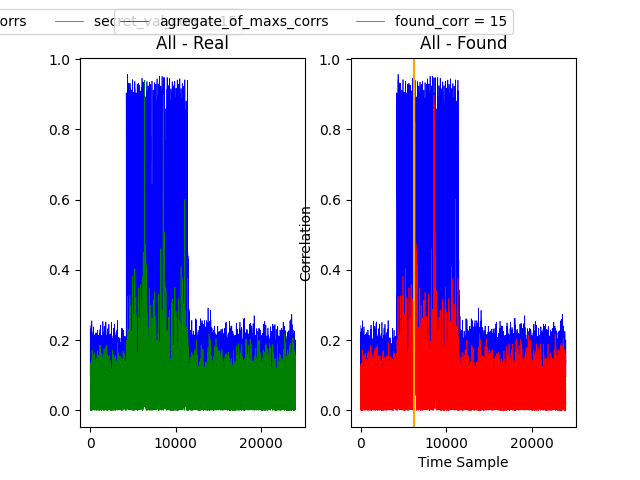

In range 6416 - 24000
 Found the soonest secret value is 16, at the time sample 6490, with correlation secret_corr = 0.893


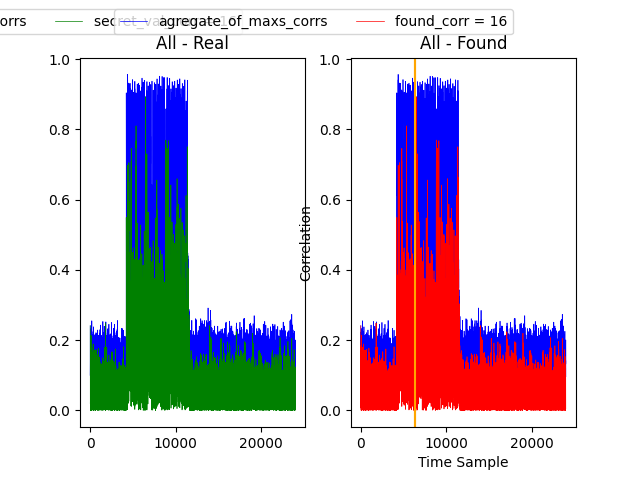

In range 6564 - 24000
 Found the soonest secret value is 17, at the time sample 6638, with correlation secret_corr = 0.936


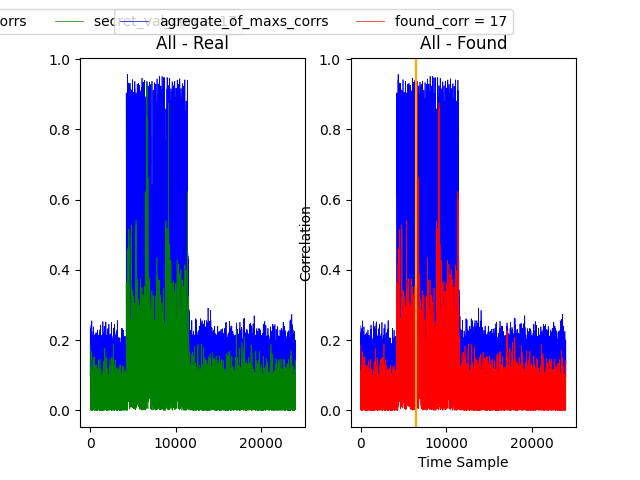

In range 6712 - 24000
 Found the soonest secret value is 18, at the time sample 6786, with correlation secret_corr = 0.924


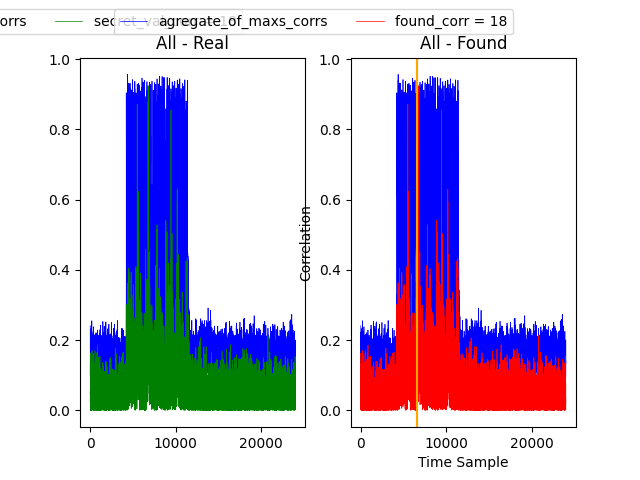

In range 6860 - 24000
 Found the soonest secret value is 19, at the time sample 6934, with correlation secret_corr = 0.935


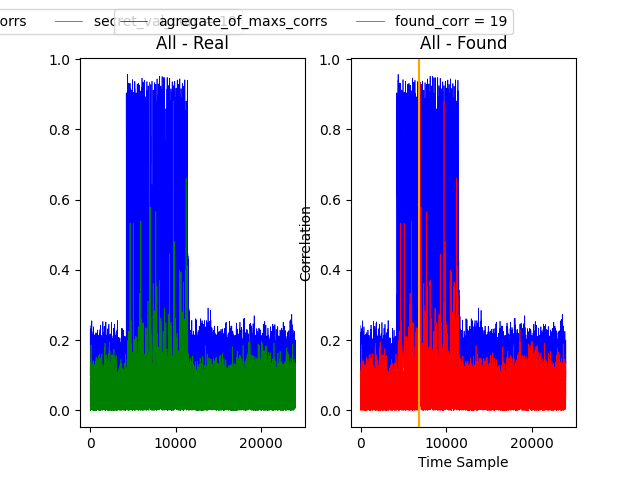

In range 7008 - 24000
 Found the soonest secret value is 20, at the time sample 7082, with correlation secret_corr = 0.928


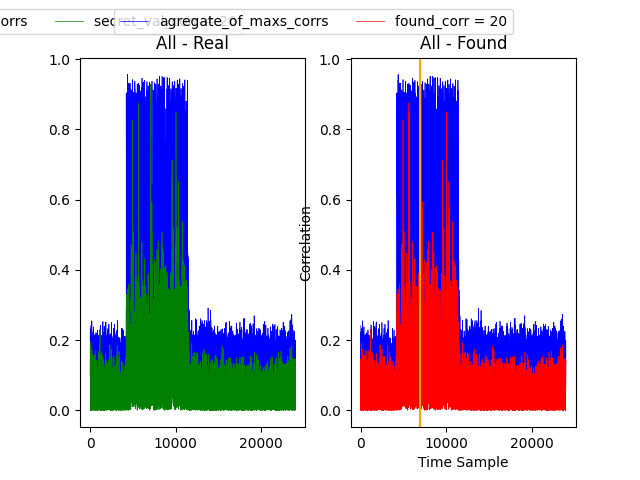

In range 7156 - 24000
 Found the soonest secret value is 21, at the time sample 7230, with correlation secret_corr = 0.937


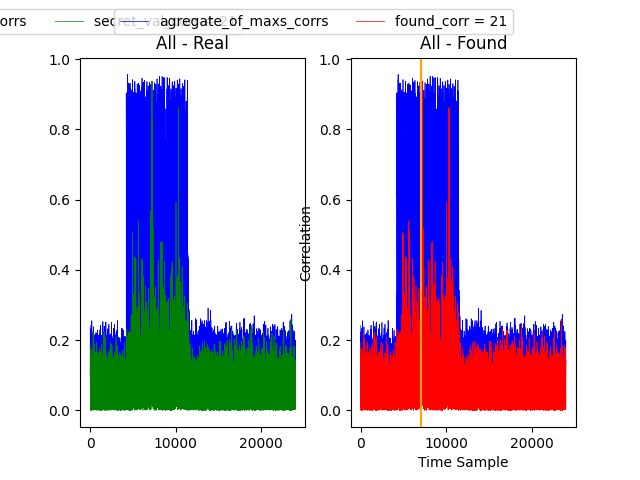

In range 7304 - 24000
 Found the soonest secret value is 22, at the time sample 7378, with correlation secret_corr = 0.912


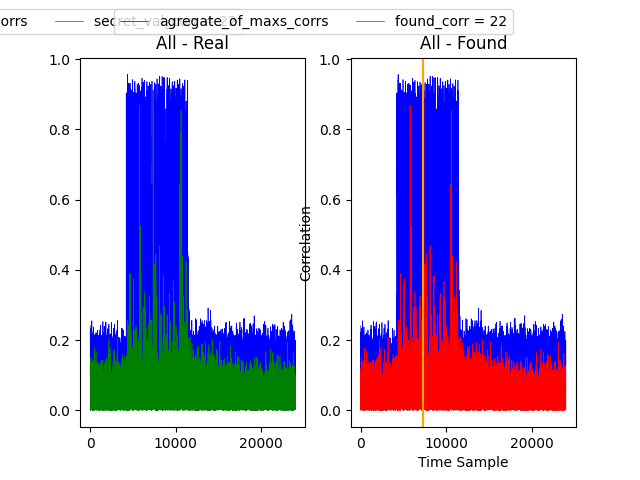

In range 7452 - 24000
 Found the soonest secret value is 23, at the time sample 7526, with correlation secret_corr = 0.933


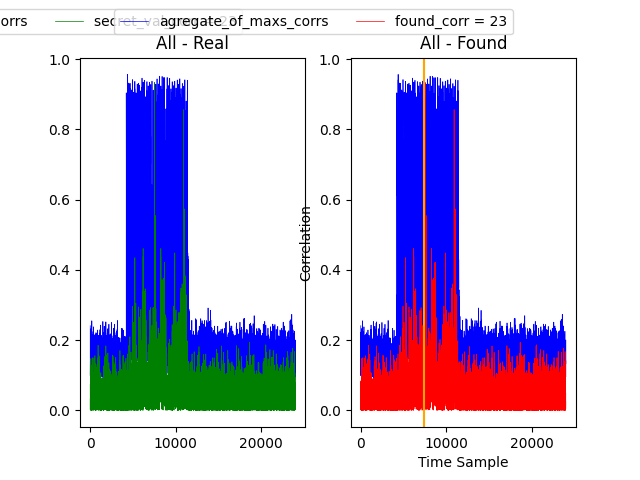

In range 7600 - 24000
 Found the soonest secret value is 24, at the time sample 7674, with correlation secret_corr = 0.929


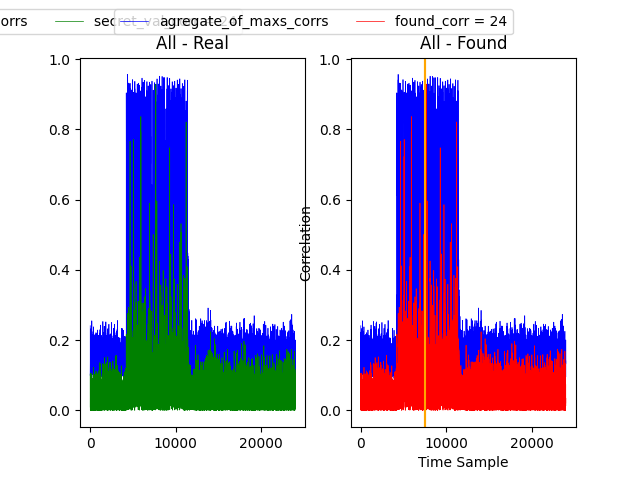

In range 7748 - 24000
 Found the soonest secret value is 25, at the time sample 7822, with correlation secret_corr = 0.944


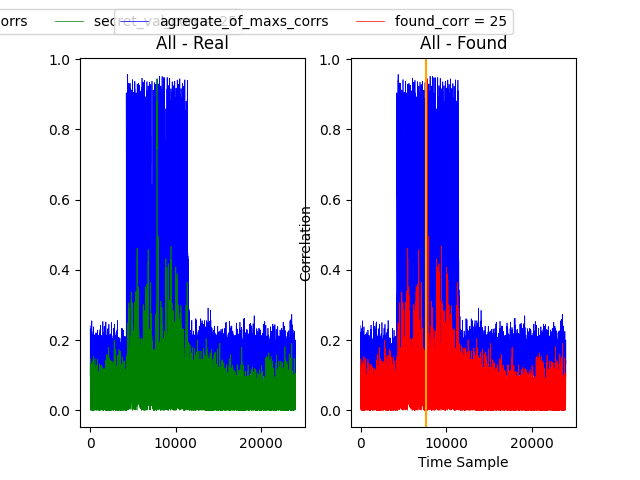

In range 7896 - 24000
 Found the soonest secret value is 26, at the time sample 7970, with correlation secret_corr = 0.930


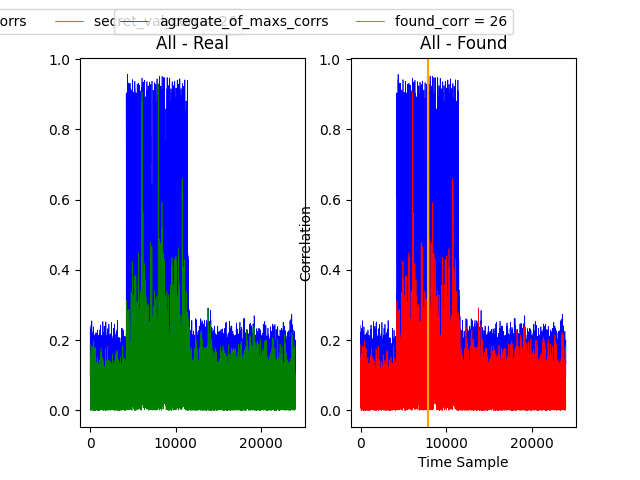

In range 8044 - 24000
 Found the soonest secret value is 27, at the time sample 8118, with correlation secret_corr = 0.952


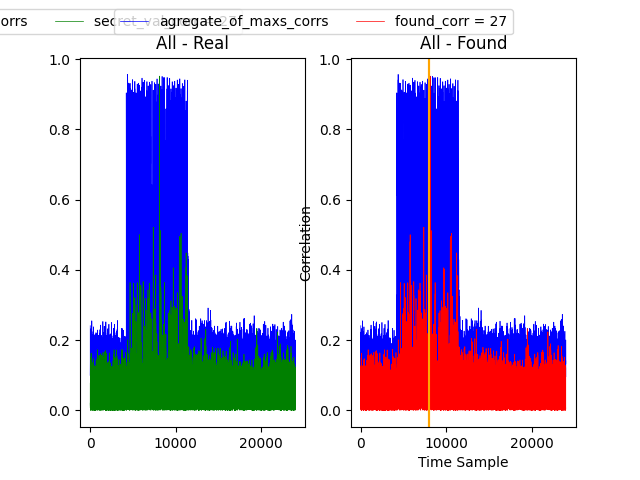

In range 8192 - 24000
 Found the soonest secret value is 28, at the time sample 8266, with correlation secret_corr = 0.924


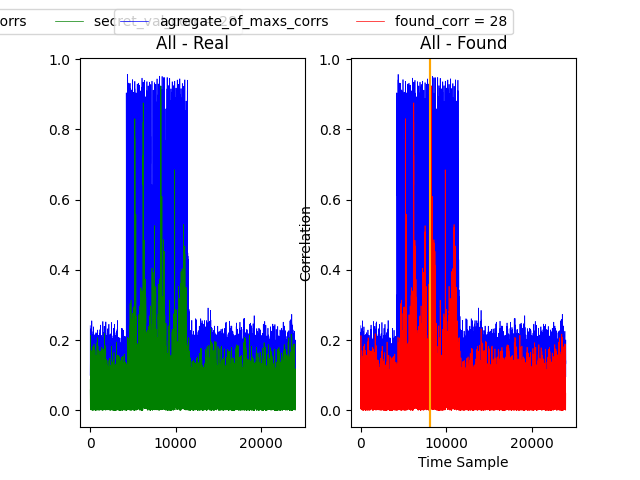

In range 8340 - 24000
 Found the soonest secret value is 29, at the time sample 8414, with correlation secret_corr = 0.951


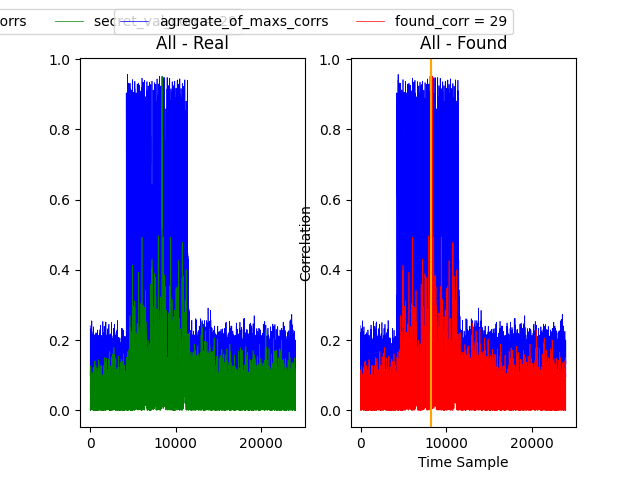

In range 8488 - 24000
 Found the soonest secret value is 30, at the time sample 8562, with correlation secret_corr = 0.948


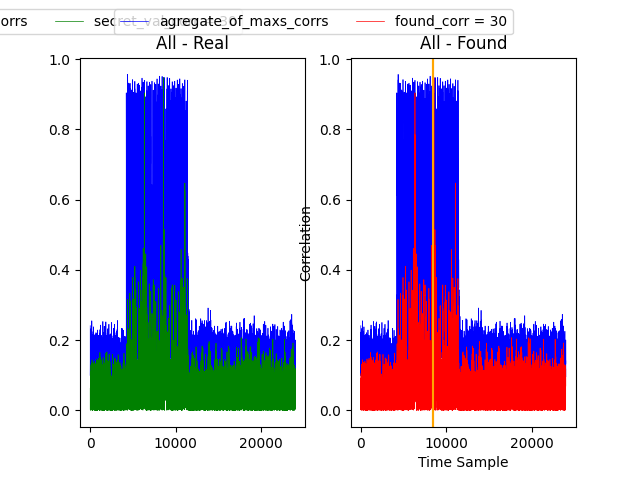

In range 8636 - 24000
 Found the soonest secret value is 31, at the time sample 8710, with correlation secret_corr = 0.948


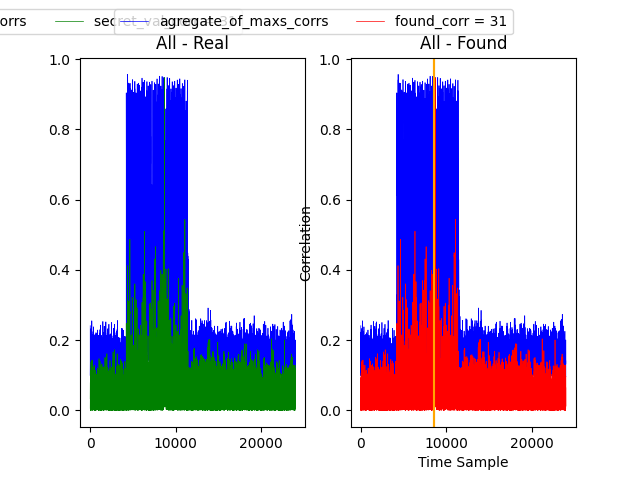

In range 8784 - 24000
 Found the soonest secret value is 32, at the time sample 8858, with correlation secret_corr = 0.859


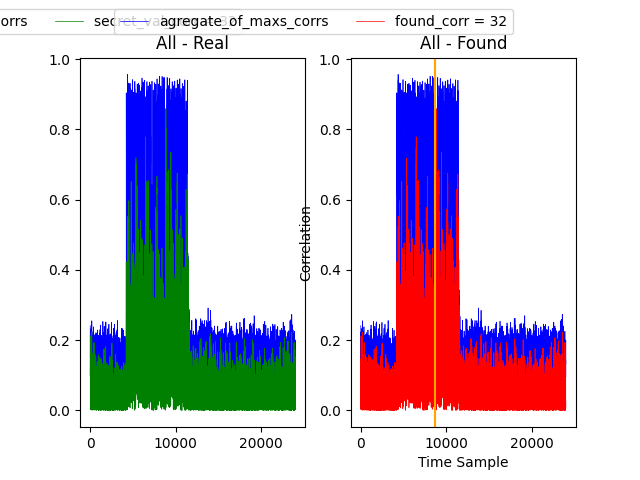

In range 8932 - 24000
 Found the soonest secret value is 33, at the time sample 9006, with correlation secret_corr = 0.948


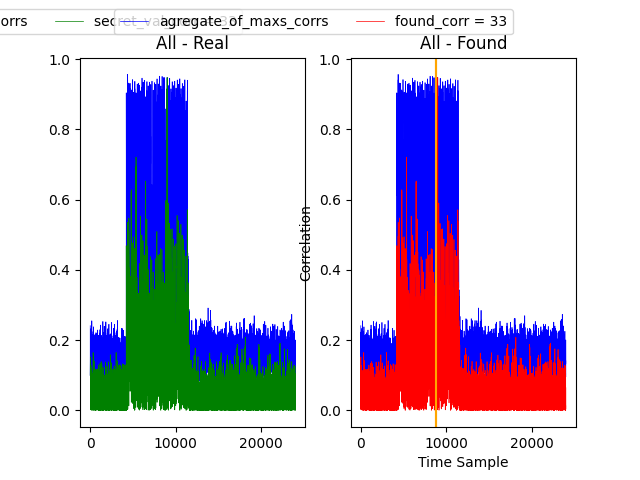

In range 9080 - 24000
 Found the soonest secret value is 34, at the time sample 9154, with correlation secret_corr = 0.925


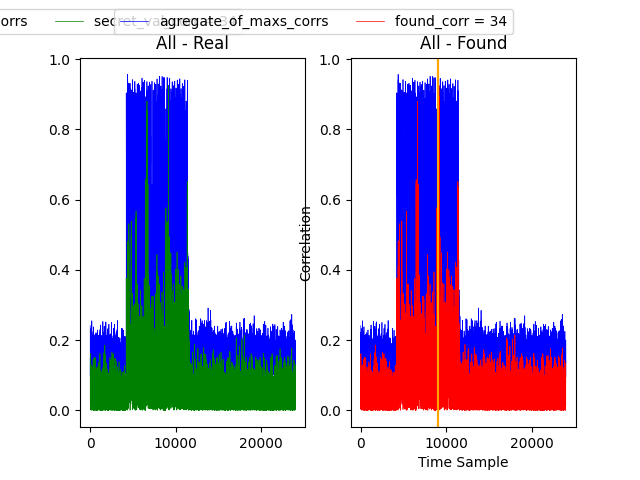

In range 9228 - 24000
 Found the soonest secret value is 35, at the time sample 9302, with correlation secret_corr = 0.945


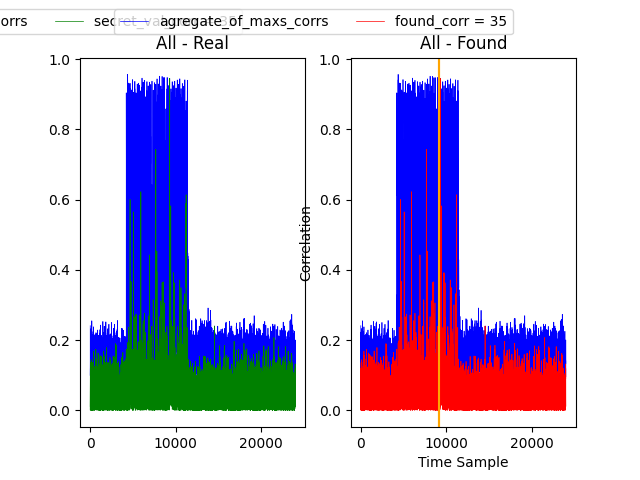

In range 9376 - 24000
 Found the soonest secret value is 36, at the time sample 9450, with correlation secret_corr = 0.916


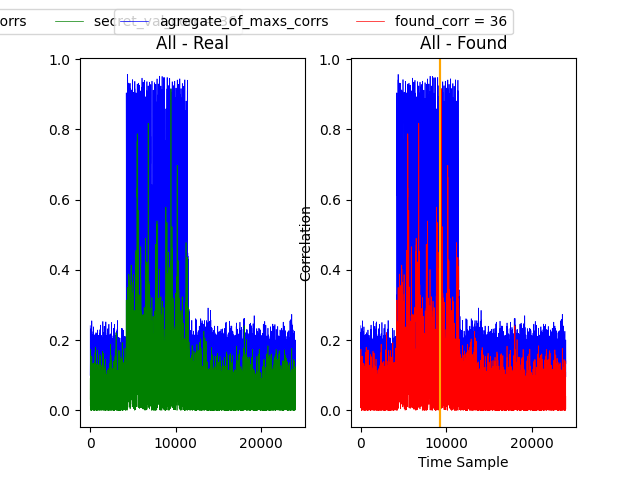

In range 9524 - 24000
 Found the soonest secret value is 37, at the time sample 9598, with correlation secret_corr = 0.936


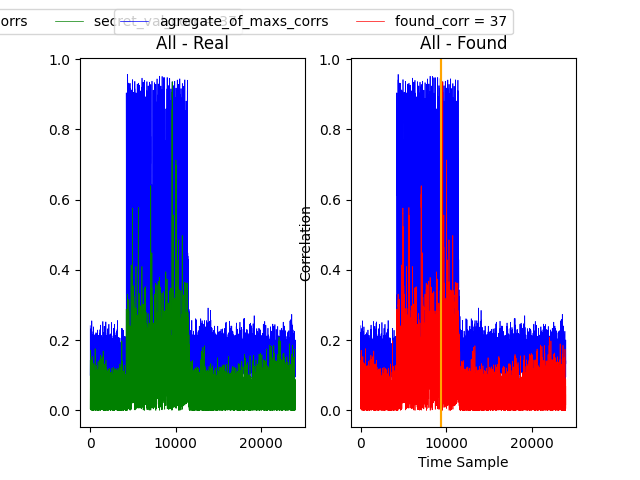

In range 9672 - 24000
 Found the soonest secret value is 38, at the time sample 9746, with correlation secret_corr = 0.925


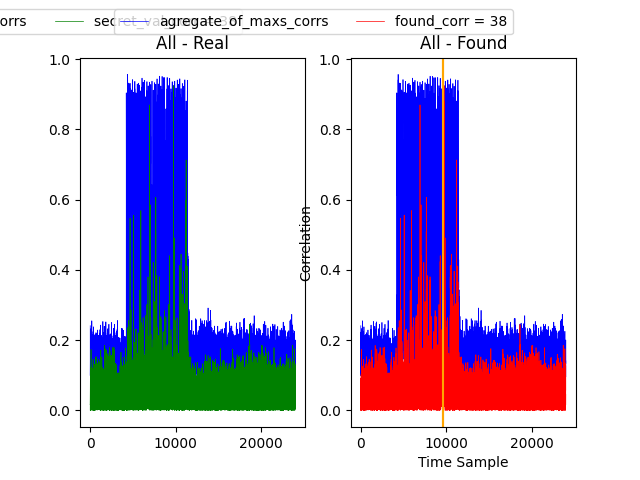

In range 9820 - 24000
 Found the soonest secret value is 39, at the time sample 9894, with correlation secret_corr = 0.937


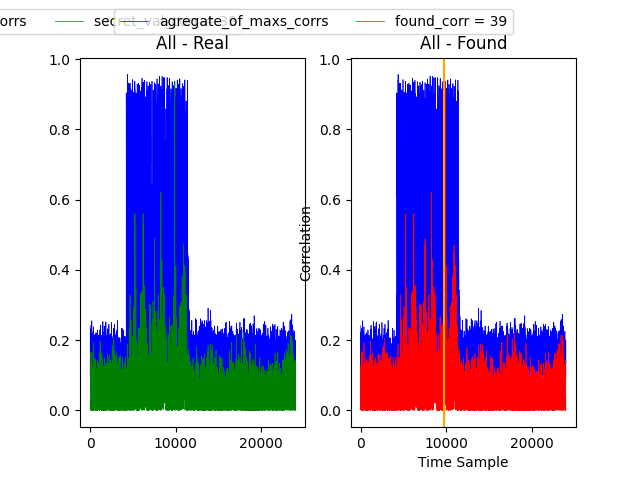

In range 9968 - 24000
 Found the soonest secret value is 40, at the time sample 10042, with correlation secret_corr = 0.918


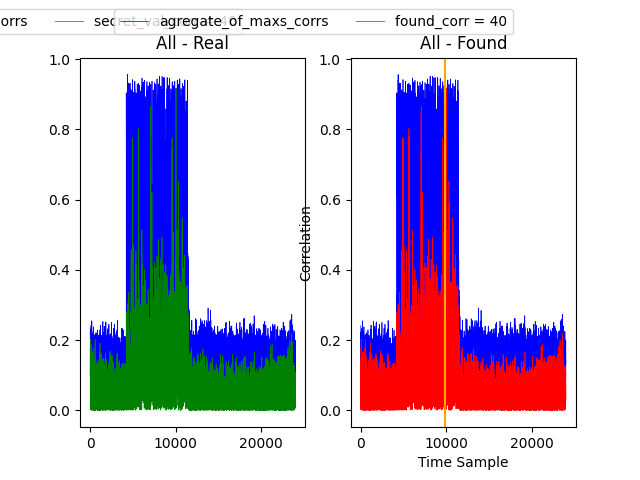

In range 10116 - 24000
 Found the soonest secret value is 41, at the time sample 10190, with correlation secret_corr = 0.941


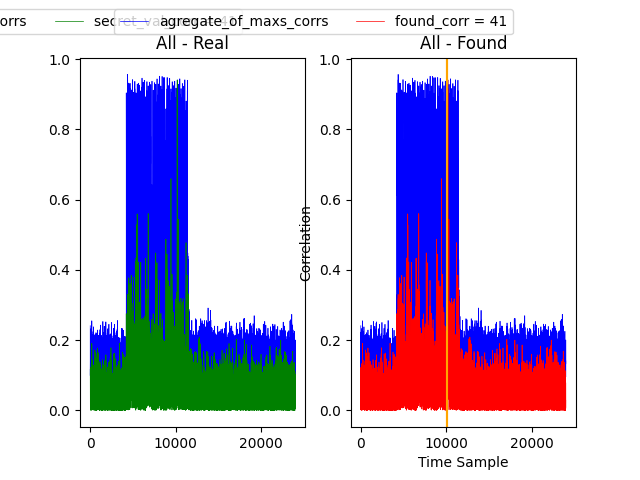

In range 10264 - 24000
 Found the soonest secret value is 42, at the time sample 10338, with correlation secret_corr = 0.928


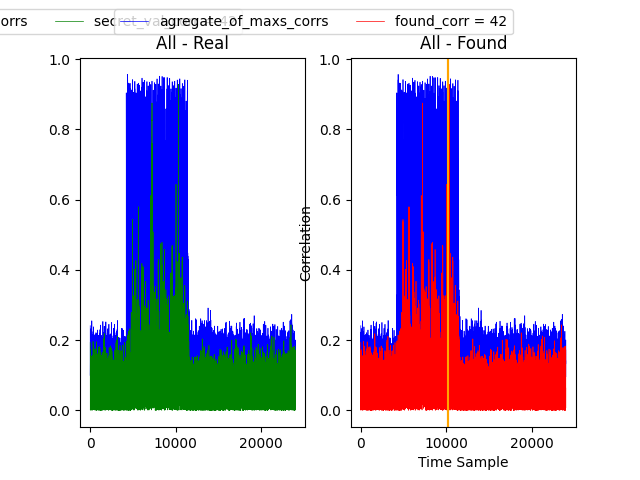

In range 10412 - 24000
 Found the soonest secret value is 43, at the time sample 10486, with correlation secret_corr = 0.944


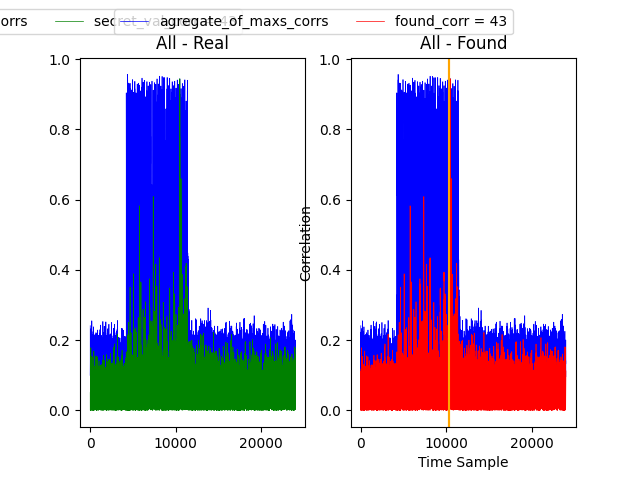

In range 10560 - 24000
 Found the soonest secret value is 44, at the time sample 10634, with correlation secret_corr = 0.916


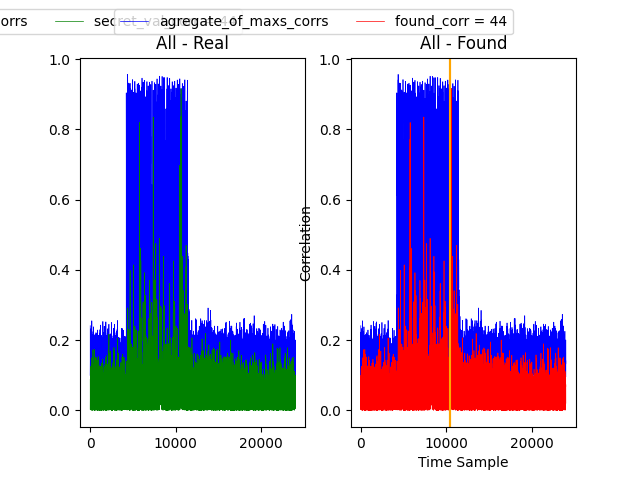

In range 10708 - 24000
 Found the soonest secret value is 45, at the time sample 10782, with correlation secret_corr = 0.931


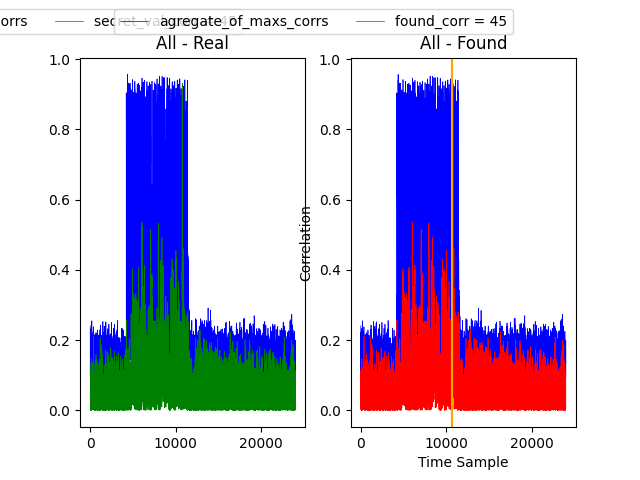

In range 10856 - 24000
 Found the soonest secret value is 46, at the time sample 10930, with correlation secret_corr = 0.923


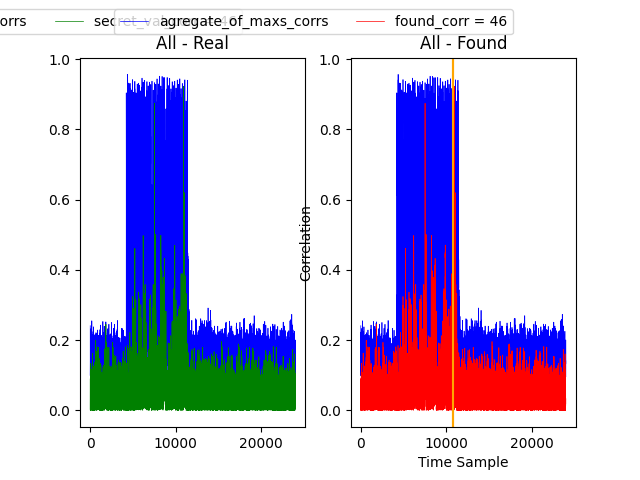

In range 11004 - 24000
 Found the soonest secret value is 47, at the time sample 11078, with correlation secret_corr = 0.941


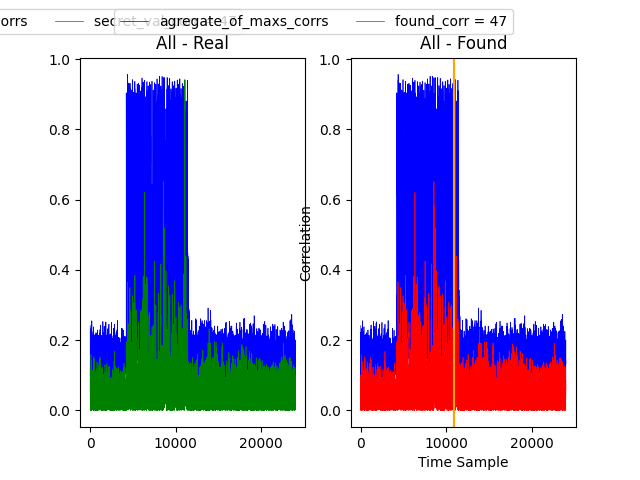

In range 11152 - 24000
 Found the soonest secret value is 48, at the time sample 11226, with correlation secret_corr = 0.881


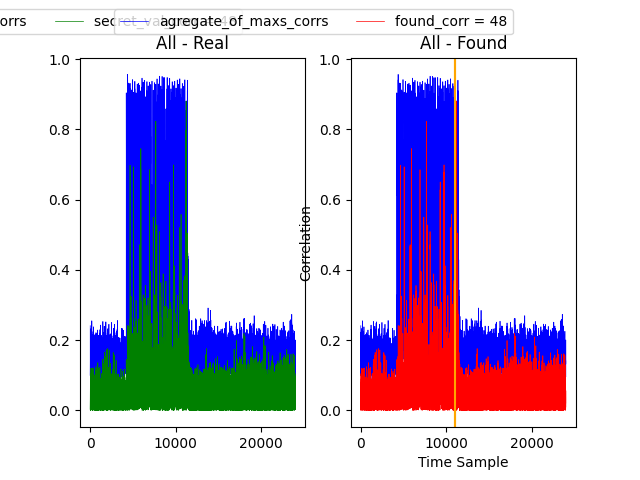

In range 11300 - 24000
 Found the soonest secret value is 49, at the time sample 11374, with correlation secret_corr = 0.940


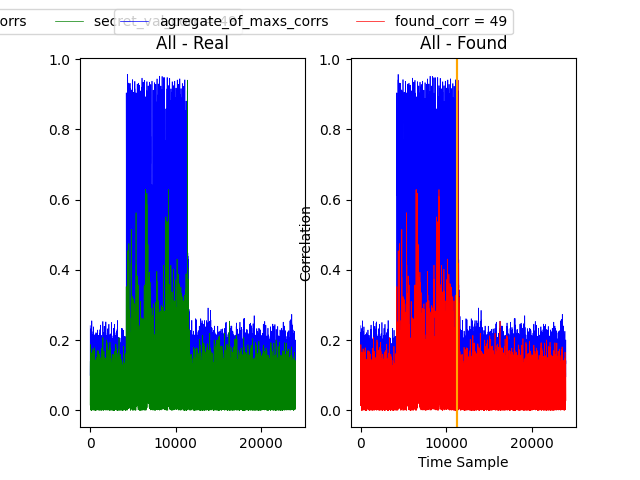

In [172]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 55
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all), show_info=True, lastIndex=index, map_2dgrMaxs=maxims_map)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

### Archive One_Mult

5


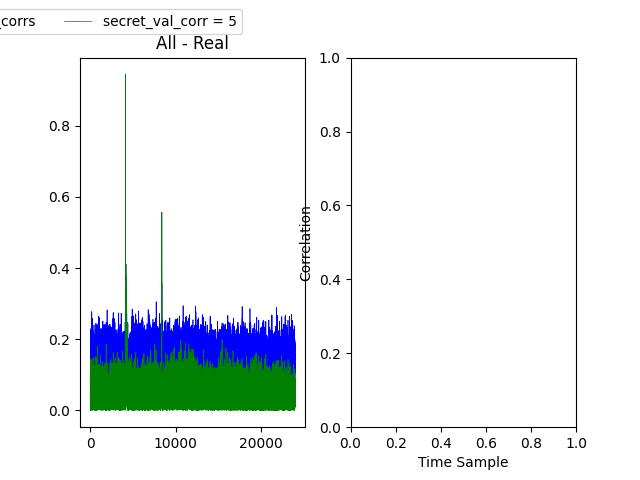

In [81]:
    secret_weight = []
    for i in out_data[0][3:out_data[0][2]+2]:
        secret_weight.append(i)
    for secret in secret_weight:
        print(secret)
        #plot_mult(np.array(ncorr_all), type = f"corr_{name}")
        index = 0
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector = get_weight(np.array(ncorr_all)[:,index:], show_info=False)
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.show()
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")

        cw.plot(colmn_maxVector) * cw.plot(ncorr_all[secret_value]) * cw.plot(ncorr_all[secret])

In [73]:
cw.plot(colmn_maxVector) * cw.plot(ncorr_all[secret_value]) * cw.plot(ncorr_all[5])

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)

In [ ]:
tmp = np.load("./database/weights__OneTimeMult_Dec1-ntg1-800.csv.npy")

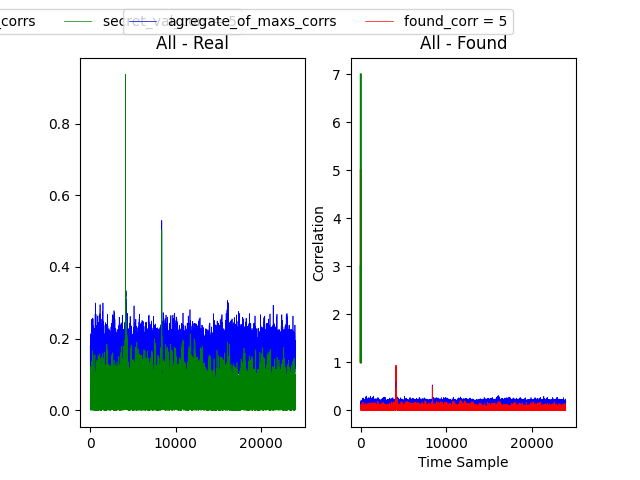

NameError: name 'fig' is not defined

In [83]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
plt.plot([1,2,2,4,5], 'r')
plt.plot([3,1,5,5,7], 'g')
plt.show()
plt.close(fig)